In [1]:
# Importing Libraries
import numpy as np  
import pandas as pd 
 
# Import dataset
dataset = pd.read_csv('Restaurant_Reviews.tsv', delimiter = '\t')

In [16]:
# library to clean data
import re 
 
# Natural Language Tool Kit
import nltk 
 
nltk.download('stopwords')

# to remove stopword
from nltk.corpus import stopwords
 
# for Stemming propose 
from nltk.stem.porter import PorterStemmer
 
# Initialize empty array to append clean text 
corpus = [] 
 
# 1000 (reviews) rows to clean
for i in range(0, 1000): 
    # substitute which are not mactch
    review = re.sub('[^a-zA-Z]', ' ', dataset['Review'][i]) 
    print(review)
    # convert all cases to lower cases
    review = review.lower()    

    # split to array(default delimiter is " ")
    review = review.split() #note that \n

    # creating PorterStemmer object to take main stem of each word
    ps = PorterStemmer() 

    # loop for stemming each word in string array at ith row 
    review = [ps.stem(word) for word in review
                if not word in set(stopwords.words('english'))] 

    # rejoin all string array elements to create back into a string
    review = ' '.join(review)  

    # append each string to create array of clean text
    corpus.append(review)# corpus : completely clean

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Wow    Loved this place 
['wow love place']
Crust is not good 
['wow love place', 'crust good']
Not tasty and the texture was just nasty 
['wow love place', 'crust good', 'tasti textur nasti']
Stopped by during the late May bank holiday off Rick Steve recommendation and loved it 
['wow love place', 'crust good', 'tasti textur nasti', 'stop late may bank holiday rick steve recommend love']
The selection on the menu was great and so were the prices 
['wow love place', 'crust good', 'tasti textur nasti', 'stop late may bank holiday rick steve recommend love', 'select menu great price']
Now I am getting angry and I want my damn pho 
['wow love place', 'crust good', 'tasti textur nasti', 'stop late may bank holiday rick steve recommend love', 'select menu great price', 'get angri want damn pho']
Honeslty it didn t taste THAT fresh  

['wow love place', 'crust good', 'tasti textur nasti', 'stop late may bank holiday rick steve recommend love', 'select menu great price', 'get angri want damn pho', 'honeslti tast fresh', 'potato like rubber could tell made ahead time kept warmer', 'fri great', 'great touch', 'servic prompt', 'would go back', 'cashier care ever say still end wayyy overpr', 'tri cape cod ravoli chicken cranberri mmmm', 'disgust pretti sure human hair', 'shock sign indic cash', 'highli recommend', 'waitress littl slow servic', 'place worth time let alon vega', 'like', 'burritto blah', 'food amaz', 'servic also cute', 'could care less interior beauti', 'perform', 'right red velvet cake ohhh stuff good', 'never brought salad ask', 'hole wall great mexican street taco friendli staff', 'took hour get food tabl restaur food luke warm sever run around like total overwhelm', 'worst salmon sashimi', 'also combo like burger fri beer decent deal', 'like final blow', 'found place accid could happier', 'seem like go

['wow love place', 'crust good', 'tasti textur nasti', 'stop late may bank holiday rick steve recommend love', 'select menu great price', 'get angri want damn pho', 'honeslti tast fresh', 'potato like rubber could tell made ahead time kept warmer', 'fri great', 'great touch', 'servic prompt', 'would go back', 'cashier care ever say still end wayyy overpr', 'tri cape cod ravoli chicken cranberri mmmm', 'disgust pretti sure human hair', 'shock sign indic cash', 'highli recommend', 'waitress littl slow servic', 'place worth time let alon vega', 'like', 'burritto blah', 'food amaz', 'servic also cute', 'could care less interior beauti', 'perform', 'right red velvet cake ohhh stuff good', 'never brought salad ask', 'hole wall great mexican street taco friendli staff', 'took hour get food tabl restaur food luke warm sever run around like total overwhelm', 'worst salmon sashimi', 'also combo like burger fri beer decent deal', 'like final blow', 'found place accid could happier', 'seem like go

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [35]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
 
# To extract max 1500 feature.
# "max_features" is attribute to
# experiment with to get better results
cv = CountVectorizer(max_features = 1500) 
 
# X contains corpus (dependent variable)
X = cv.fit_transform(corpus).toarray() 

# y contains answers if reviewis positive or negative
y = dataset.iloc[:, 1].values


In [36]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
 
# experiment with "test_size" to get better results
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [37]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
 
# n_estimators can be said as number of
# trees, experiment with n_estimators
# to get better results 

model = RandomForestClassifier(n_estimators = 501, criterion = 'entropy')
                           
model.fit(X_train, y_train) 

C:\Users\Lenovo\anaconda3\envs\nlp_course\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=501, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [38]:
# Predicting the Test set results
y_pred = model.predict(X_test)
y_pred

C:\Users\Lenovo\anaconda3\envs\nlp_course\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


array([0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1], dtype=int64)

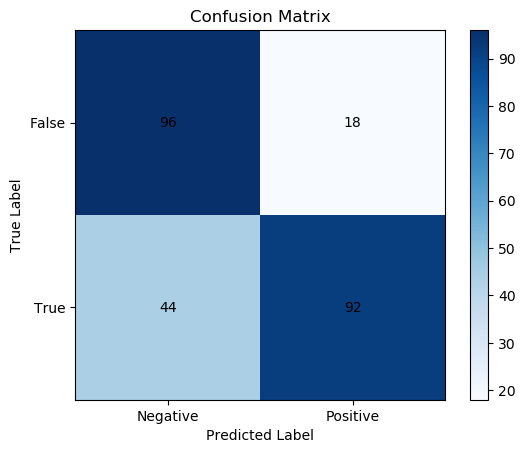

In [39]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Create confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.imshow(conf_mat, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.xticks([0, 1], ["Negative", "Positive"])
plt.yticks([0, 1], ["False", "True"])
for i in range(2):
    for j in range(2):
        plt.text(j, i, str(conf_mat[i][j]), horizontalalignment='center', verticalalignment='center')
plt.show()